# ABInBev KPI Analytics

In [26]:
%cd '/Users/pandes3/Desktop/hack'

/Users/pandes3/Desktop/hack


In [41]:
import os
import numpy as np
from sklearn import svm
from __future__ import division
import csv

import pandas as pd
from sklearn.feature_extraction import DictVectorizer as DV
from sklearn import preprocessing

import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import Image


## Read the given csv data for sales 

In [39]:
df = pd.read_csv("hacksalesdata.csv",header=0)

## PreProcessing

In [ ]:
#Occupancy Contains this garbage value which needs to be replaced

In [36]:
df.replace(to_replace='#Value!',value=0,inplace=True)

/Users/pandes3/anaconda/lib/python2.7/site-packages/pandas/core/common.py:361: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask = arr == x


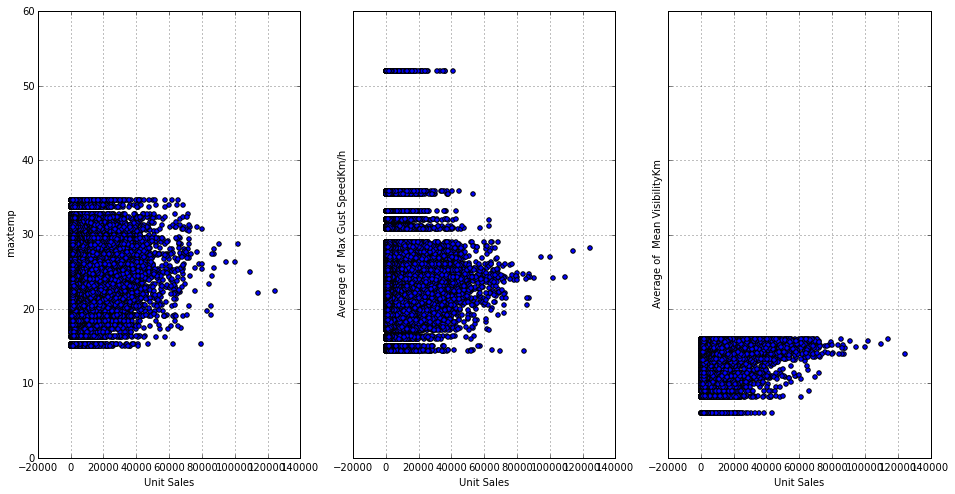

In [43]:
fig, axs = plt.subplots(1, 3, sharey=True)
df.plot(kind='scatter', x='Unit Sales', y=' maxtemp ', ax=axs[0], figsize=(16, 8))
df.plot(kind='scatter', x='Unit Sales' , y=' Average of  Max Gust SpeedKm/h ', ax=axs[1])
df.plot(kind='scatter', x='Unit Sales', y=' Average of  Mean VisibilityKm ', ax=axs[2])

In [ ]:
#Extract Unique SKUs

In [ ]:
cnum = df.Product.unique()

## Fitting the regression model and calculating the coefficients 

In [30]:

lm_list = []
cnum = [x for x in cnum if str(x) != 'nan']
print cnum


for n in cnum :
    df1 = df.loc[df['Product']==n]
    #Vectorize the attributes 
    vectorizer = DV( sparse = False )
    # After several iterations of statistical analysis and business context, we zeroed down on these features 
    cols_to_retain = ['Display Count','Display Share','Distribution (%)','Feature Count','Feature Share',
                      'Price per Unit','Price per Volume','Volume Sales',
                      'Volume Share of Category','Unemp. Rate in city',
                      'Occupancy (%) ','Consumer Price Index, Malt Beverages','Consumer Price Index, Wine'
                      ,'Producer Price Index by Industry']
    cat_df = df1[ cols_to_retain ]
    train_dict = cat_df.T.to_dict().values()
    

    vec_x_cat_train = vectorizer.fit_transform(train_dict)
   

    x_train = vec_x_cat_train
    x_train[np.isnan(x_train)]=0


    
    le_sex = preprocessing.LabelEncoder()

    #to convert into numbers

    df1['Unit Sales']= le_sex.fit_transform(df1['Unit Sales'])

    # create X and y (independent and target varible)
    X = vec_x_cat_train
    y = df1['Unit Sales']

    # Instantiate the Regression model
    lm = LinearRegression()
    # Fit the regression model on the preprocessed data
    lm.fit(X, y)
    print n
    print('**************')
    print lm.intercept_
    #print lm.coef_
    #print zip(vectorizer.get_feature_names(), lm.coef_)
   
    lm_list.append([n]+zip(vectorizer.get_feature_names(), lm.coef_))
 

array(['BRAND130 6-PACK 11.2-13 OZ GLASS',
       'BRAND1 12-PACK 11.2-13 OZ GLASS',
       'BRAND16 6-PACK 11.2-13 OZ GLASS',
       'BRAND8 12-PACK 11.2-13 OZ GLASS', 'BRAND8 6-PACK 11.2-13 OZ GLASS',
       'BRAND10 6-PACK 11.2-13 OZ GLASS',
       'BRAND15 6-PACK 11.2-13 OZ GLASS',
       'BRAND20 12-PACK 11.2-13 OZ GLASS',
       'BRAND1 6-PACK 11.2-13 OZ GLASS', 'BRAND19 6-PACK 11.2-13 OZ GLASS',
       'BRAND19 6-PACK 12 OZ CAN', 'BRAND26 12-PACK 11.2-13 OZ GLASS',
       'BRAND176 12-PACK 11.2-13 OZ GLASS',
       'BRAND140 12-PACK 11.2-13 OZ GLASS',
       'BRAND140 24-PACK 11.2-13 OZ GLASS',
       'BRAND140 6-PACK 11.2-13 OZ GLASS',
       'BRAND144 12-PACK 11.2-13 OZ GLASS',
       'BRAND4 12-PACK 11.2-13 OZ GLASS',
       'BRAND18 6-PACK 11.2-13 OZ GLASS',
       'BRAND145 12-PACK 11.2-13 OZ GLASS',
       'BRAND2 12-PACK 11.2-13 OZ GLASS', 'BRAND2 12-PACK 12 OZ CAN',
       'BRAND2 24-PACK 11.2-13 OZ GLASS', 'BRAND2 6-PACK 11.2-13 OZ GLASS',
       'BRAND12 12-PACK 11.2-1

## Serialize the results 

In [23]:
   
with open("lmoutputProdsales2.csv","wb") as file:
    writer = csv.writer(file)
    for line in lm_list:
        writer.writerow(line)

['BRAND130 6-PACK 11.2-13 OZ GLASS', 'BRAND1 12-PACK 11.2-13 OZ GLASS', 'BRAND16 6-PACK 11.2-13 OZ GLASS', 'BRAND8 12-PACK 11.2-13 OZ GLASS', 'BRAND8 6-PACK 11.2-13 OZ GLASS', 'BRAND10 6-PACK 11.2-13 OZ GLASS', 'BRAND15 6-PACK 11.2-13 OZ GLASS', 'BRAND20 12-PACK 11.2-13 OZ GLASS', 'BRAND1 6-PACK 11.2-13 OZ GLASS', 'BRAND19 6-PACK 11.2-13 OZ GLASS', 'BRAND19 6-PACK 12 OZ CAN', 'BRAND26 12-PACK 11.2-13 OZ GLASS', 'BRAND176 12-PACK 11.2-13 OZ GLASS', 'BRAND140 12-PACK 11.2-13 OZ GLASS', 'BRAND140 24-PACK 11.2-13 OZ GLASS', 'BRAND140 6-PACK 11.2-13 OZ GLASS', 'BRAND144 12-PACK 11.2-13 OZ GLASS', 'BRAND4 12-PACK 11.2-13 OZ GLASS', 'BRAND18 6-PACK 11.2-13 OZ GLASS', 'BRAND145 12-PACK 11.2-13 OZ GLASS', 'BRAND2 12-PACK 11.2-13 OZ GLASS', 'BRAND2 12-PACK 12 OZ CAN', 'BRAND2 24-PACK 11.2-13 OZ GLASS', 'BRAND2 6-PACK 11.2-13 OZ GLASS', 'BRAND12 12-PACK 11.2-13 OZ GLASS', 'BRAND14 6-PACK 11.2-13 OZ GLASS', 'BRAND146 4-PACK 16 OZ CAN', 'BRAND6 12-PACK 11.2-13 OZ GLASS', 'BRAND317 SINGLES 25 OZ CAN

/Users/pandes3/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:28: SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index,col_indexer] = value instead


In [24]:
with open('lmoutputProdsales2.csv','rb') as file:
    reader = csv.reader(file)
    data = []
    for line in reader :
        data.append(line)

## Formatiing the results 

In [ ]:
with open('transposedProdsales2.csv','wb') as file:
    writer = csv.writer(file)
    for line in data:
        row = []
        row.append(line[0])
        for n in range(1,len(line)):
            att = ' '.join(line[n].replace('(','').replace(')','').split(',')[:-1]).replace("'",'')
            coeff = line[n].replace('(','').replace(')','').split(',')[-1].replace("'",'')
            row.append(att)
            row.append(coeff)
            writer.writerow(row)
            row = []
            row.append(line[0])
    

## Accuracy Score for the above Model

In [33]:
 lm.score(X,y)

0.95060231390521721

## k-fold cross validation to check overfitting

In [32]:
#Evaluating Overfitting by K Fold Cross Validation
from sklearn.cross_validation import KFold, cross_val_score
k_fold = KFold(len(y), n_folds=10, shuffle=True, random_state=0)
print cross_val_score(lm, X, y, cv=k_fold, n_jobs=1)

[ 0.95080081  0.97480766  0.61554217  0.93325591  0.97443446  0.96725905
  0.9335664   0.95584604  0.95826072  0.96913967]


## Scalability Architecture

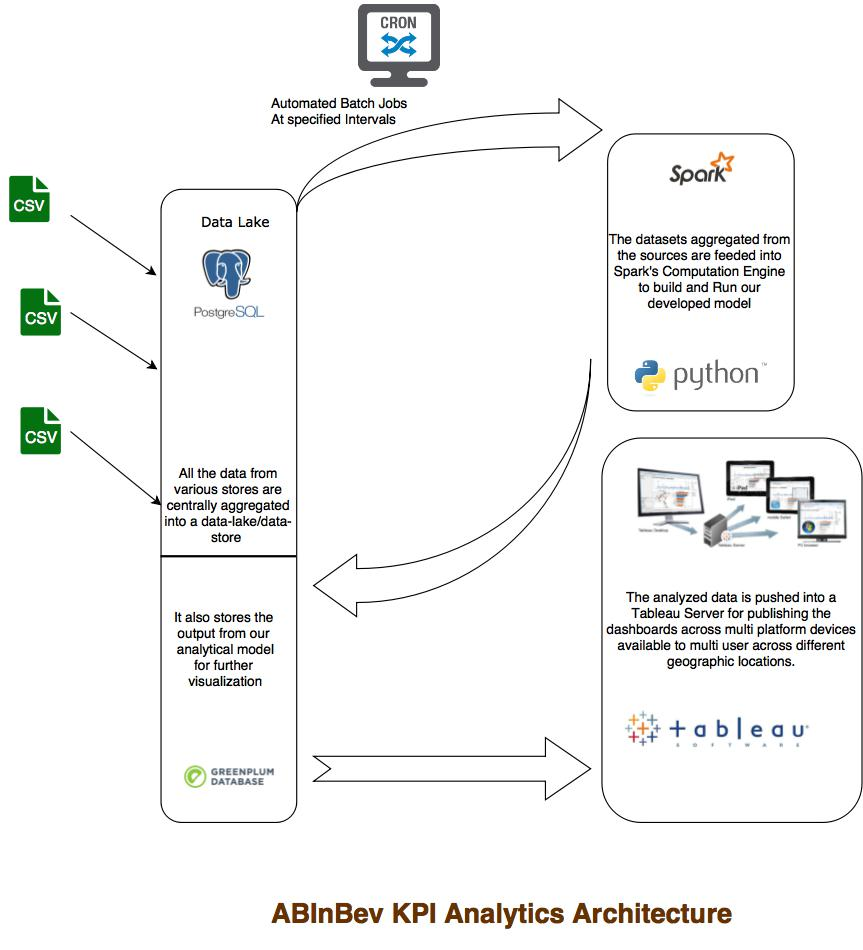

In [42]:
Image(filename='architecture.jpeg')